In [14]:
from astropy.utils.masked.function_helpers import median
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
mega = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC640/Datasets/Week7&8/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_20240421.csv")
pick_10 = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC640/Datasets/Week7&8/Lottery_Pick_10_Winning_Numbers__Beginning_1987_20240421.csv")
power = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC640/Datasets/Week7&8/Lottery_Powerball_Winning_Numbers__Beginning_2010_20240421.csv")

In [4]:
mega.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,04/16/2024,21 26 36 44 59,2,4.0
1,04/12/2024,01 12 14 18 66,16,2.0
2,04/09/2024,34 43 51 52 69,25,4.0
3,04/05/2024,20 30 54 63 65,14,3.0
4,04/02/2024,10 50 56 60 66,19,3.0


In [5]:
pick_10.head()

,Draw Date,Winning Numbers
0,04/20/2024,01 08 17 18 34 35 39 41 42 44 48 52 58 60 61 6...
1,04/19/2024,01 03 05 10 14 16 21 27 32 36 39 42 49 54 60 6...
2,04/18/2024,05 07 19 21 25 32 34 37 39 42 48 58 59 63 66 6...
3,04/17/2024,01 07 10 14 15 17 20 21 23 26 29 53 55 57 58 6...
4,04/16/2024,01 05 07 10 12 14 33 39 43 46 50 52 55 63 65 6...


In [6]:
power.head()

,Draw Date,Winning Numbers,Multiplier
0,04/20/2024,04 35 41 44 58 25,3.0
1,04/17/2024,24 29 44 47 54 02,2.0
2,04/15/2024,07 16 41 56 61 23,3.0
3,04/13/2024,07 33 40 43 69 10,5.0
4,04/10/2024,06 07 12 24 36 15,2.0


In [7]:
draw_dict = dict(zip(pick_10['Draw Date'], pick_10['Winning Numbers']))
sums = {}
distributions = {}
for date in draw_dict:
    numbers = draw_dict[date].split(" ")
    sums[date] = sum(map(int, numbers))
    for _ in numbers:
        if _ not in distributions:
            distributions[_] = 1
        else:
            distributions[_] += 1

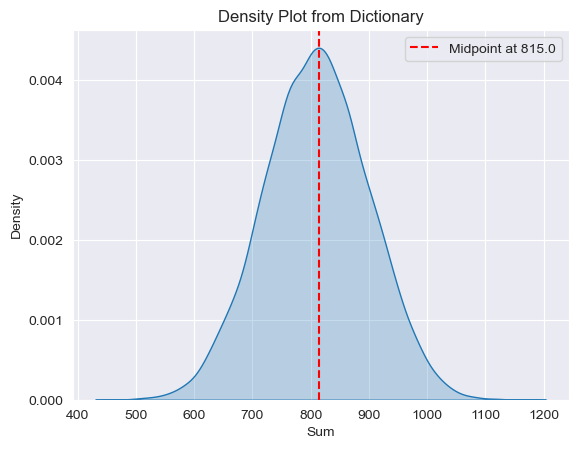

In [42]:
sums_df = pd.DataFrame(list(sums.items()), columns=['Date', 'Sum'])
ax = sns.kdeplot(sums_df['Sum'], fill=True)
plt.xlabel('Sum')
plt.title('Density Plot from Dictionary')

sums_df.set_index('Date', inplace=True)

mid_point = (sums_df["Sum"].mode()[0] + sums_df["Sum"].median())/2
plt.axvline(mid_point, color='red', linestyle='--', label=f"Midpoint at {mid_point}")
plt.legend()
plt.show()

In [44]:
power.head()
draw_dict = dict(zip(power['Draw Date'], power['Winning Numbers']))
sums = {}
distributions = {}
for date in draw_dict:
    numbers = draw_dict[date].split(" ")
    sums[date] = sum(map(int, numbers))
    for _ in numbers:
        if _ not in distributions:
            distributions[_] = 1
        else:
            distributions[_] += 1

In [47]:
sorted_distributions = dict(sorted(distributions.items()))

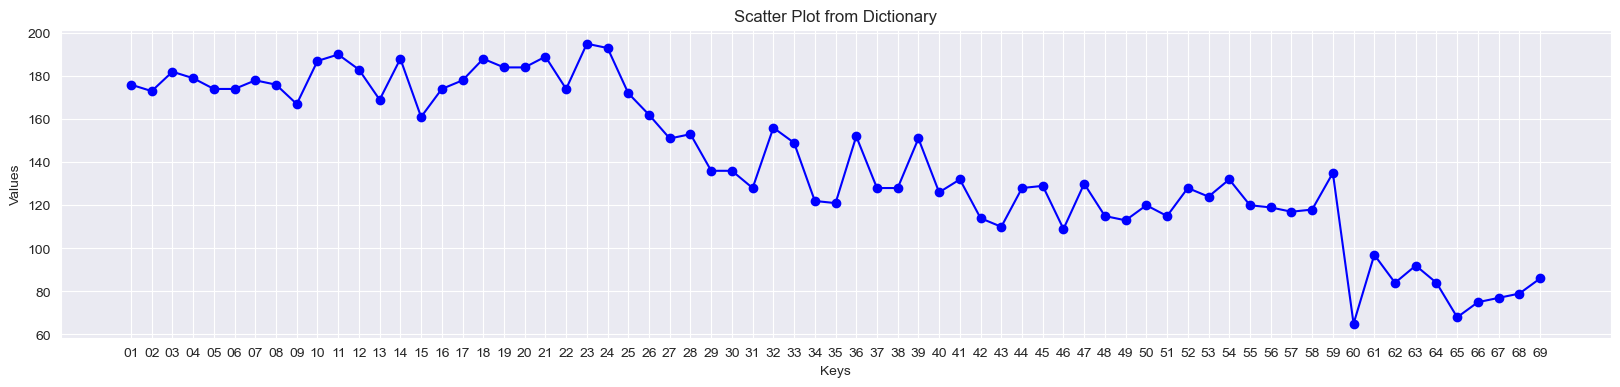

In [58]:
plt.figure(figsize=(20,4))
plt.scatter(sorted_distributions.keys(),sorted_distributions.values(), color='blue', marker='o')
plt.plot(sorted_distributions.keys(),sorted_distributions.values(), color='blue')
plt.title('Scatter Plot from Dictionary')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.grid(True)
plt.show()